# Titanic 6 (Final)

> `one-hot encoding`

- Master면 1 아니면 0, Miss 면 1 아니면0 이런 방식으로 코딩하는 것을 의미함

- pandas의 get_dummies를 이용하여 쉽게 해결할 수 있음

- Initial_Master, Initial_Miss, Initial_Mr, Initial_Mrs, Initial_Other같이 새로운 5개의 columns이 생길 것

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df_train=pd.read_csv('C:/Users/ehfus/Downloads/titanic/train.csv')
df_test=pd.read_csv('C:/Users/ehfus/Downloads/titanic/test.csv')

In [185]:
df_train['Initial']=df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial']=df_test['Name'].str.extract('([A-Za-z]+)\.')

In [186]:
df_train['Initial'].replace(['Mile','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)
df_test['Initial'].replace(['Mile','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)

In [187]:
df_train.loc[(df_train['Age'].isnull())&(df_train['Initial']=='Mr'),'Age']=33
df_train.loc[(df_train['Age'].isnull())&(df_train['Initial']=='Mrs'),'Age']=37
df_train.loc[(df_train['Age'].isnull())&(df_train['Initial']=='Master'),'Age']=5
df_train.loc[(df_train['Age'].isnull())&(df_train['Initial']=='Miss'),'Age']=22
df_train.loc[(df_train['Age'].isnull())&(df_train['Initial']=='Other'),'Age']=45

df_test.loc[(df_test['Age'].isnull())&(df_test['Initial']=='Mr'),'Age']=33
df_test.loc[(df_test['Age'].isnull())&(df_test['Initial']=='Mrs'),'Age']=37
df_test.loc[(df_test['Age'].isnull())&(df_test['Initial']=='Master'),'Age']=5
df_test.loc[(df_test['Age'].isnull())&(df_test['Initial']=='Miss'),'Age']=22
df_test.loc[(df_test['Age'].isnull())&(df_test['Initial']=='Other'),'Age']=45

In [188]:
df_train['Embarked'].fillna('S',inplace=True)
df_test['Embarked'].fillna('S',inplace=True)

In [189]:
df_train['Age_cat']=0
df_test['Age_cat']=0

In [190]:
def f(x):
    if x<10 :
        return  0
    elif x<20 :
        return  1
    elif x<30 :
        return  2    
    elif x<40 :
        return  3    
    elif x<50 :
        return  4    
    elif x<60 :
        return  5    
    elif x<70 :
        return  6
    else :
        return  7

In [191]:
df_train['Age_cat']=df_train['Age'].apply(f)
df_test['Age_cat']=df_test['Age'].apply(f)

In [192]:
df_train.drop(['Age'],axis=1,inplace=True)
df_test.drop(['Age'],axis=1,inplace=True)

In [193]:
df_train['Embarked']=df_train['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Embarked']=df_test['Embarked'].map({'C':0,'Q':1,'S':2})

In [194]:
df_train['Sex']=df_train['Sex'].map({'female':0,'male':1})
df_test['Sex']=df_test['Sex'].map({'female':0,'male':1})

In [195]:
df_train['FamilySize']=df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize']=df_test['SibSp'] + df_test['Parch'] + 1

In [196]:
df_train['Initial']=df_train['Initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})
df_test['Initial']=df_test['Initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})

In [197]:
df_train=pd.get_dummies(df_train, columns=['Initial'],prefix='Initial')
df_test=pd.get_dummies(df_test, columns=['Initial'],prefix='Initial')

In [198]:
df_train=pd.get_dummies(df_train,columns=['Embarked'],prefix='Embarked')
df_test=pd.get_dummies(df_test,columns=['Embarked'],prefix='Embarked')

- 만약 100개정도 되는 feature일 때 one-hot-encoding사용하면 오히려 역효과가 날 수 있음, (columns가 100개 정도 생성되기 때문에)

- 따라서 다른 방법을 사용해야 함 (추후에 알아볼 것)

> 머신 러닝하기 전 필요없는 자료들은 빼주자

In [199]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

---

> `sklearn을 이용해서 modeling 해보자`

In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [201]:
X_train = df_train.drop('Survived',axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [202]:
df_train.shape

(891, 14)

- 여기서 30%를 valid로 주고 70%를 train으로 줬음

- 따라서

In [203]:
X_tr,X_vid,y_tr,y_vid=train_test_split(X_train, target_label, test_size=0.3,random_state=2018)

In [204]:
X_tr.shape

(623, 13)

In [205]:
891*0.7

623.6999999999999

In [206]:
model = RandomForestClassifier()
model.fit(X_tr,y_tr)

RandomForestClassifier()

In [207]:
prediction = model.predict(X_vid)

- 생존 여부

In [208]:
prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1], dtype=int64)

In [209]:
print('총{}명 중 {:.2f}% 정확도로 생존 맞춤'.format(y_vid.shape[0], 100*metrics.accuracy_score(prediction, y_vid)))

총268명 중 82.46% 정확도로 생존 맞춤


In [210]:
(prediction == y_vid).sum()/prediction.shape[0]

0.8246268656716418

----

> `Feature Importance`

- 학습된 모델은 $Feature Importance$를 가지게 되는데, 우리는 이것을 확인하여 지금 만든 모델이 어떤 feature에 영향을 많이 받았는 지 확인할 수 있다. 

- 쉽게 말해 $10$ $=$ $4x_1$ $+$ $2x_2$ $+$ $1x_3$ 을 생각하면, 우리는 $x_1$ 이 결과값(10)에 큰 영향을 준다고 생각할 수 있습니다. 

- $feature importance$ 는 4,2,1을 이야기하며 $x_1$ 이 가장 큰 값(4)를 가지므로 , 이 모델에 가장 큰 영향을 미친다고 말할 수 있습니다.

학습시키면 반드시 갖고 있음

In [211]:
model.feature_importances_

array([0.10150411, 0.1142312 , 0.32581198, 0.11957181, 0.09204819,
       0.01034795, 0.03533741, 0.12524962, 0.02401136, 0.00518094,
       0.01610738, 0.01340272, 0.01719532])

In [213]:
from pandas import Series

In [214]:
feature_importance=model.feature_importances_
Series_feat_imp=Series(feature_importance, index=df_test.columns)

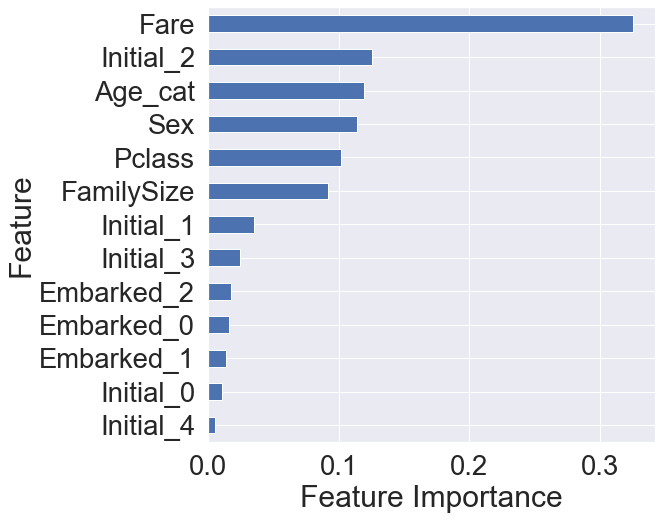

In [215]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

- titanic생존에는 Fare부터 중요한 순으로 작용을 한다고 가정할 수 있겠음

In [218]:
# prediction=model.predict(X_test)
# 여기서 자료 수정 좀 해야될 것 같음